## 数据预处理

In [311]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
import os

# Load the data
df=pd.read_csv('Wimbledon_featured_matches.csv')
df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,0,0,0,38.620,50.971,11,123.0,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,0,0,0,17.533,27.766,5,114.0,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,0,0,0,10.882,18.328,4,124.0,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,0,0,0,7.893,10.537,1,130.0,C,NCTL,D


查看基本信息

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_poi

填补缺失值

In [313]:
#填补数据集中的所有缺失值，使用上一个非缺失值来填补缺失值
df.fillna(method='ffill',inplace=True)
df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,0,0,0,38.620,50.971,11,123.0,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,0,0,0,17.533,27.766,5,114.0,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,0,0,0,10.882,18.328,4,124.0,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,0,0,0,7.893,10.537,1,130.0,C,NCTL,D


独热编码

In [314]:
#将return depth中的ND值替换为1，将return depth中的D值替换为2
df['return_depth'].replace('ND',1,inplace=True)
df['return_depth'].replace('D',2,inplace=True)
#serve width
df['serve_width'].replace('BC',1,inplace=True)
df['serve_width'].replace('B',2,inplace=True)
df['serve_width'].replace('BW',3,inplace=True)
df['serve_width'].replace('W',4,inplace=True)
df['serve_width'].replace('C',5,inplace=True)
#serve depth
df['serve_depth'].replace('NCTL',1,inplace=True)
df['serve_depth'].replace('CTL',2,inplace=True)
#AD
df['p1_score'].replace('AD',50,inplace=True)
df['p2_score'].replace('AD',50,inplace=True)

In [315]:
df.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,1,1,1
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,2,2,1
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,2,1,2
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,3,2,2
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,4,1,2


## 特征选择

In [316]:
group1=df

In [317]:
#提取elapsed_time列
elapsed_time=group1[['elapsed_time','p1_points_won','p2_points_won']]
elapsed_time

,elapsed_time,p1_points_won,p2_points_won
0,0:00:00,0,1
1,0:00:38,1,1
2,0:01:01,1,2
3,0:01:31,2,2
4,0:02:21,3,2
...,...,...,...
7279,4:39:58,165,165
7280,4:40:43,166,165
7281,4:41:20,166,166
7282,4:41:52,167,166


In [318]:
momentum=group1[['point_victor','server']]
momentum

,point_victor,server
0,2,1
1,1,1
2,2,1
3,1,1
4,1,1
...,...,...
7279,1,1
7280,1,1
7281,2,1
7282,1,1


In [319]:
#计算最近两分的发球方得分情况
def calulate_con(data,window=2):
    momentum=np.zeros(len(data))
    #计算每个点的得分者
    data['point_winner']=data.apply(lambda x:1 if x['point_victor']==x['server'] else -1,axis=1)

    #计算每个点的动量
    for i in range(window,len(data)):
        momentum[i]=data['point_winner'].iloc[i-window+1:i+1].sum()

    return momentum

df['momentum']=calulate_con(df)
df['momentum']

0       0.0
1       0.0
2       0.0
3       0.0
4       2.0
       ... 
7279    0.0
7280    2.0
7281    0.0
7282    0.0
7283    2.0
Name: momentum, Length: 7284, dtype: float64

In [320]:
#计算每个点的得分者，1代表p1得分，2代表p2得分，0代表平局
df['point_winner']=df.apply(lambda x:1 if x['point_victor']==x['server'] else 2 if x['point_victor']!=x['server'] else 0,axis=1)
df['point_winner']

0       2
1       1
2       2
3       1
4       1
       ..
7279    1
7280    1
7281    2
7282    1
7283    1
Name: point_winner, Length: 7284, dtype: int64

In [321]:
df.head(10)

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,point_winner,momentum
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,6.000,7.840,2,95.0,1,1,1,2,0.0
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,5.253,7.094,1,118.0,2,2,1,1,0.0
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,13.800,19.808,4,120.0,2,1,2,2,0.0
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,51.108,75.631,13,130.0,3,2,2,1,0.0
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0.649,0.813,1,112.0,4,1,2,1,2.0
5,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:50,1,1,6,0,0,0,...,0,5.291,4.249,2,97.0,3,1,1,2,0.0
6,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:03:33,1,1,7,0,0,0,...,0,6.817,17.821,1,109.0,4,2,2,1,0.0
7,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:04:01,1,1,8,0,0,0,...,0,17.503,18.067,6,105.0,2,1,1,2,0.0
8,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:04:48,1,1,9,0,0,0,...,0,34.489,24.594,7,128.0,1,2,2,1,0.0
9,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:05:32,1,1,10,0,0,0,...,0,21.235,27.427,5,110.0,2,1,1,1,2.0


In [322]:
#读取排名
rank=pd.read_csv('rank.csv')
rank

,Player,Rank1
0,Alejandro Davidovich Fokina,31
1,Alexander Bublik,26
2,Alexander Zverev,7
3,Andrey Rublev,5
4,Carlos Alcaraz,2
5,Christopher Eubanks,34
6,Daniel Elahi Galan,93
7,Daniil Medvedev,3
8,Denis Shapovalov,109
9,Frances Tiafoe,16


In [323]:
#根据df中的player1和player2的名字，找到对应的排名
def find_rank(row):
    p1_rank=rank[rank['Player']==row['player1']]['Rank1']
    p2_rank=rank[rank['Player']==row['player2']]['Rank1']
    if len(p1_rank)==0 or len(p2_rank)==0:
        return np.nan
    else:
        return p1_rank.values[0]-p2_rank.values[0]
    
df['rank_diff']=df.apply(find_rank,axis=1)
df['rank_diff']

0      -17
1      -17
2      -17
3      -17
4      -17
        ..
7279     1
7280     1
7281     1
7282     1
7283     1
Name: rank_diff, Length: 7284, dtype: int64

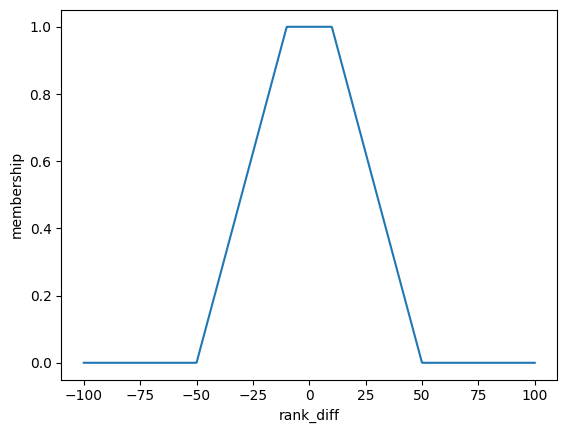

In [324]:
#用隶属函数对rank_diff进行模糊化,一个0-1区间的隶属函数，-10到10应该是0.5，50的时候是1，-50的时候是0
def fuzzy_rank_diff(x):
    if x<=-50:
        return 0
    elif x>-50 and x<=-10:
        return (x+50)/40
    elif x>-10 and x<=10:
        return 1
    elif x>10 and x<=50:
        return (50-x)/40
    elif x>50:
        return 0


#画出隶属函数图
x=np.linspace(-100,100,1000)
y=[fuzzy_rank_diff(i) for i in x]
plt.plot(x,y)
plt.xlabel('rank_diff')
plt.ylabel('membership')
plt.show()


In [325]:
#计算隶属度
df['rank_diff']=df['rank_diff'].apply(fuzzy_rank_diff)
df['rank_diff']

0       0.825
1       0.825
2       0.825
3       0.825
4       0.825
        ...  
7279    1.000
7280    1.000
7281    1.000
7282    1.000
7283    1.000
Name: rank_diff, Length: 7284, dtype: float64

In [326]:
df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,point_winner,momentum,rank_diff
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,6.000,7.840,2,95.0,1,1,1,2,0.0,0.825
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,5.253,7.094,1,118.0,2,2,1,1,0.0,0.825
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,13.800,19.808,4,120.0,2,1,2,2,0.0,0.825
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,51.108,75.631,13,130.0,3,2,2,1,0.0,0.825
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0.649,0.813,1,112.0,4,1,2,1,2.0,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,38.620,50.971,11,123.0,5,1,2,1,0.0,1.000
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,17.533,27.766,5,114.0,4,1,1,1,2.0,1.000
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,10.882,18.328,4,124.0,4,1,2,2,0.0,1.000
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,7.893,10.537,1,130.0,5,1,2,1,0.0,1.000


In [327]:
#根据跑步距离计算每个点的疲劳度
dis=df[['p1_distance_run','p2_distance_run']]
dis

,p1_distance_run,p2_distance_run
0,6.000,7.840
1,5.253,7.094
2,13.800,19.808
3,51.108,75.631
4,0.649,0.813
...,...,...
7279,38.620,50.971
7280,17.533,27.766
7281,10.882,18.328
7282,7.893,10.537


In [328]:
#将p1_distance_run转化为极大型指标
df['p1_distance_run']=1-df['p1_distance_run']
df['p2_distance_run']=1-df['p2_distance_run']
df

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,point_winner,momentum,rank_diff
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,-5.000,-6.840,2,95.0,1,1,1,2,0.0,0.825
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,-4.253,-6.094,1,118.0,2,2,1,1,0.0,0.825
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,-12.800,-18.808,4,120.0,2,1,2,2,0.0,0.825
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,-50.108,-74.631,13,130.0,3,2,2,1,0.0,0.825
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0.351,0.187,1,112.0,4,1,2,1,2.0,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,-37.620,-49.971,11,123.0,5,1,2,1,0.0,1.000
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,-16.533,-26.766,5,114.0,4,1,1,1,2.0,1.000
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,-9.882,-17.328,4,124.0,4,1,2,2,0.0,1.000
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,-6.893,-9.537,1,130.0,5,1,2,1,0.0,1.000


In [329]:
vari=df
vari2=df

In [330]:
vari['point_no'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: point_no, dtype: int64

In [331]:
label_ls=[]
x1_ls=[]
x2_ls=[]
x3_ls=[]
x4_ls=[]
x5_ls=[]
x6_ls=[]
x7_ls=[]
x8_ls=[]

# 假设vari是之前已经定义好的DataFrame
for match_id,set_no,game_no,point_no in zip(vari['match_id'],vari['set_no'],vari['game_no'],vari['point_no']):
    match=vari[vari.match_id==match_id]
    set_=match[match.set_no==set_no]
    game=set_[set_.game_no==game_no]
    point=game[game.point_no==point_no]

    x1=point['p2_games'].values[0]#p1在当前set中赢得的game数
    # 尝试将得分转换为数值类型，这里假设得分可以直接转换
    x2 = pd.to_numeric(point['p1_score'].values[0], errors='coerce') - pd.to_numeric(point['p2_score'].values[0], errors='coerce')
    x3=1 if point['server'].values[0]==1 else 0#当前point中p1是否发球
    x4=1 if x2>0 else 0#当前point中p1是否领先
    x5=point['speed_mph'].values[0]#当前point的球速
    x6=point['p1_distance_run'].values[0]#当前point中p1总跑动的距离
    x7=point['rank_diff'].values[0]#当前point中p1和p2的排名差距的隶属度
    x8=point['p1_unf_err'].values[0]#当前point中p1的非受迫性失误数
    index=match.index.tolist().index(point.index.tolist()[0])

    label=1 if point['point_victor'].values[0]==1 else 0#当前point的胜者是否是p1
    label_ls.append(label)
    x1_ls.append(x1)
    x2_ls.append(x2)
    x3_ls.append(x3)
    x4_ls.append(x4)
    x5_ls.append(x5)
    x6_ls.append(x6)
    x7_ls.append(x7)
    x8_ls.append(x8)
    

In [332]:
dataset=pd.DataFrame({'id':df['match_id'].values, 'label':label_ls,'p1_games':x1_ls,'p1_score_diff':x2_ls,'server':x3_ls,'p1_lead':x4_ls,'speed_mph':x5_ls,'p1_distance_run':x6_ls,'rank_diff_membership':x7_ls,'p1_unf_err':x8_ls})
dataset

,id,label,p1_games,p1_score_diff,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,2023-wimbledon-1301,0,0,0,1,0,95.0,-5.000,0.825,1
1,2023-wimbledon-1301,1,0,-15,1,0,118.0,-4.253,0.825,0
2,2023-wimbledon-1301,0,0,0,1,0,120.0,-12.800,0.825,1
3,2023-wimbledon-1301,1,0,-15,1,0,130.0,-50.108,0.825,0
4,2023-wimbledon-1301,1,0,0,1,0,112.0,0.351,0.825,0
...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,1,4,-15,1,0,123.0,-37.620,1.000,0
7280,2023-wimbledon-1701,1,4,0,1,0,114.0,-16.533,1.000,0
7281,2023-wimbledon-1701,0,4,15,1,1,124.0,-9.882,1.000,0
7282,2023-wimbledon-1701,1,4,0,1,0,130.0,-6.893,1.000,0


In [333]:
vari=dataset
vari.to_csv('p1.csv',index=False)
vari

,id,label,p1_games,p1_score_diff,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,2023-wimbledon-1301,0,0,0,1,0,95.0,-5.000,0.825,1
1,2023-wimbledon-1301,1,0,-15,1,0,118.0,-4.253,0.825,0
2,2023-wimbledon-1301,0,0,0,1,0,120.0,-12.800,0.825,1
3,2023-wimbledon-1301,1,0,-15,1,0,130.0,-50.108,0.825,0
4,2023-wimbledon-1301,1,0,0,1,0,112.0,0.351,0.825,0
...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,1,4,-15,1,0,123.0,-37.620,1.000,0
7280,2023-wimbledon-1701,1,4,0,1,0,114.0,-16.533,1.000,0
7281,2023-wimbledon-1701,0,4,15,1,1,124.0,-9.882,1.000,0
7282,2023-wimbledon-1701,1,4,0,1,0,130.0,-6.893,1.000,0


In [334]:
vari=vari2
vari

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,point_winner,momentum,rank_diff
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,-5.000,-6.840,2,95.0,1,1,1,2,0.0,0.825
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,-4.253,-6.094,1,118.0,2,2,1,1,0.0,0.825
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,-12.800,-18.808,4,120.0,2,1,2,2,0.0,0.825
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,-50.108,-74.631,13,130.0,3,2,2,1,0.0,0.825
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0.351,0.187,1,112.0,4,1,2,1,2.0,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:39:58,5,10,330,2,2,5,...,-37.620,-49.971,11,123.0,5,1,2,1,0.0,1.000
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:40:43,5,10,331,2,2,5,...,-16.533,-26.766,5,114.0,4,1,1,1,2.0,1.000
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:20,5,10,332,2,2,5,...,-9.882,-17.328,4,124.0,4,1,2,2,0.0,1.000
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,4:41:52,5,10,333,2,2,5,...,-6.893,-9.537,1,130.0,5,1,2,1,0.0,1.000


In [335]:
label_ls=[]
x1_ls=[]
x2_ls=[]
x3_ls=[]
x4_ls=[]
x5_ls=[]
x6_ls=[]
x7_ls=[]
x8_ls=[]
for match_id,set_no,game_no,point_no in zip(vari['match_id'],vari['set_no'],vari['game_no'],vari['point_no']):
    match=vari[vari.match_id==match_id]
    set_=match[match.set_no==set_no]
    game=set_[set_.game_no==game_no]
    point=game[game.point_no==point_no]

    x1=point['p2_games'].values[0]#p1在当前set中赢得的game数
    # 尝试将得分转换为数值类型，这里假设得分可以直接转换
    x2 = pd.to_numeric(point['p2_score'].values[0], errors='coerce') - pd.to_numeric(point['p1_score'].values[0], errors='coerce')
    x3=1 if point['server'].values[0]==1 else 0#当前point中p1是否发球
    x4=1 if x2>0 else 0#当前point中p1是否领先
    x5=point['speed_mph'].values[0]#当前point的球速
    x6=point['p2_distance_run'].values[0]#当前point中p1总跑动的距离
    x7=point['rank_diff'].values[0]#当前point中p1和p2的排名差距的隶属度
    x8=point['p2_unf_err'].values[0]#当前point中p1的非受迫性失误数
    index=match.index.tolist().index(point.index.tolist()[0])

    label=1 if point['point_victor'].values[0]==2 else 0#当前point的胜者是否是p2
    label_ls.append(label)
    x1_ls.append(x1)
    x2_ls.append(x2)
    x3_ls.append(x3)
    x4_ls.append(x4)
    x5_ls.append(x5)
    x6_ls.append(x6)
    x7_ls.append(x7)
    x8_ls.append(x8)

In [336]:
dataset=pd.DataFrame({'label':label_ls,'p1_games':x1_ls,'p1_score_diff':x2_ls,'server':x3_ls,'p1_lead':x4_ls,'speed_mph':x5_ls,'p1_distance_run':x6_ls,'rank_diff_membership':x7_ls,'p1_unf_err':x8_ls})
dataset

,label,p1_games,p1_score_diff,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,1,0,0,1,0,95.0,-6.840,0.825,0
1,0,0,15,1,1,118.0,-6.094,0.825,0
2,1,0,0,1,0,120.0,-18.808,0.825,0
3,0,0,15,1,1,130.0,-74.631,0.825,0
4,0,0,0,1,0,112.0,0.187,0.825,0
...,...,...,...,...,...,...,...,...,...
7279,0,4,15,1,1,123.0,-49.971,1.000,0
7280,0,4,0,1,0,114.0,-26.766,1.000,0
7281,1,4,-15,1,0,124.0,-17.328,1.000,0
7282,0,4,0,1,0,130.0,-9.537,1.000,0


In [337]:
vari2=dataset
vari2.to_csv('p2.csv',index=False)
vari2

,label,p1_games,p1_score_diff,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,1,0,0,1,0,95.0,-6.840,0.825,0
1,0,0,15,1,1,118.0,-6.094,0.825,0
2,1,0,0,1,0,120.0,-18.808,0.825,0
3,0,0,15,1,1,130.0,-74.631,0.825,0
4,0,0,0,1,0,112.0,0.187,0.825,0
...,...,...,...,...,...,...,...,...,...
7279,0,4,15,1,1,123.0,-49.971,1.000,0
7280,0,4,0,1,0,114.0,-26.766,1.000,0
7281,1,4,-15,1,0,124.0,-17.328,1.000,0
7282,0,4,0,1,0,130.0,-9.537,1.000,0


In [338]:
vari2.to_csv('p2.csv',index=False)

In [339]:
vari2

,label,p1_games,p1_score_diff,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,1,0,0,1,0,95.0,-6.840,0.825,0
1,0,0,15,1,1,118.0,-6.094,0.825,0
2,1,0,0,1,0,120.0,-18.808,0.825,0
3,0,0,15,1,1,130.0,-74.631,0.825,0
4,0,0,0,1,0,112.0,0.187,0.825,0
...,...,...,...,...,...,...,...,...,...
7279,0,4,15,1,1,123.0,-49.971,1.000,0
7280,0,4,0,1,0,114.0,-26.766,1.000,0
7281,1,4,-15,1,0,124.0,-17.328,1.000,0
7282,0,4,0,1,0,130.0,-9.537,1.000,0
